# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df_airbnb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airbnb.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [21]:
df_airbnb.shape

(13232, 9)

In [16]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [17]:
df_airbnb.tail()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
13227,19388006,135915593,Entire home/apt,São Vicente,0,0.0,6,3.0,415.0
13228,19393935,5376796,Entire home/apt,Santa Maria Maior,0,0.0,3,1.0,50.0
13229,19396300,6115933,Entire home/apt,Santo António,0,0.0,6,4.0,138.0
13230,19397373,97139334,Entire home/apt,São Vicente,0,0.0,4,1.0,56.0
13231,19400722,28219108,Entire home/apt,Areeiro,0,0.0,5,3.0,75.0


In [18]:
df_airbnb.dtypes

,0
room_id,int64
host_id,int64
room_type,object
neighborhood,object
reviews,int64
overall_satisfaction,float64
accommodates,int64
bedrooms,float64
price,float64


In [19]:
df_airbnb.columns.tolist()

['room_id',
 'host_id',
 'room_type',
 'neighborhood',
 'reviews',
 'overall_satisfaction',
 'accommodates',
 'bedrooms',
 'price']

In [20]:
df_airbnb.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso.


Nota:
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [22]:
cond1 = (df_airbnb['bedrooms'] >= 2)
cond2 = (df_airbnb['reviews'] > 10)
cond3 = (df_airbnb['overall_satisfaction'] > 4)
cond4 = df_airbnb['room_type'].str.contains(r'entire|apartment|vivienda|entero', case=False, na=False)
condicion_final = cond1 & cond2 & cond3 & cond4

In [24]:
df_filtrado = df_airbnb[condicion_final]
df_caso1 = df_filtrado.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

In [25]:
df_caso1.head(3)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
120,176153,842219,Entire home/apt,Misericórdia,438,5.0,4,2.0,102.0
16,44043,192830,Entire home/apt,Santa Maria Maior,316,5.0,7,3.0,80.0
140,202150,989393,Entire home/apt,Santa Maria Maior,274,5.0,4,2.0,62.0


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [37]:
df_caso2 = df_airbnb[(df_airbnb['room_id'] == 97503) | (df_airbnb['room_id'] == 90387)]

print("Propiedades de Roberto y Clara:")
display(df_caso2)

Propiedades de Roberto y Clara:


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
41,90387,490050,Private room,Santo António,204,5.0,2,1.0,46.0
48,97503,515924,Private room,Santo António,39,4.0,2,1.0,26.0


In [39]:
criticas_roberto = df_caso2[df_caso2['room_id'] == 97503]['reviews'].sum()
criticas_clara   = df_caso2[df_caso2['room_id'] == 90387]['reviews'].sum()

if criticas_roberto > criticas_clara:
    print("Roberto tiene más críticas que Clara.")
elif criticas_roberto < criticas_clara:
    print("Clara tiene más críticas que Roberto.")
else:
    print("Roberto y Clara tienen la misma cantidad de críticas.")

Clara tiene más críticas que Roberto.


In [41]:
df_caso2.to_excel("roberto.xlsx", index=False)

from google.colab import files
files.download("roberto.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

**PRIMER AGRUPAMIENTO**

In [69]:
filtro = (df_airbnb['price'] <= 50) & (df_airbnb['room_type'].str.lower() == 'shared room'.lower())
df_caso3 = df_airbnb[filtro].copy()

df_caso3 = df_caso3.sort_values(
    by=['overall_satisfaction', 'price'],
    ascending=[False, True]
)

df_caso3.head(10)


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
9065,14933182,91501272,Shared room,Santo António,5,5.0,8,1.0,11.0
6056,10397682,32344156,Shared room,Misericórdia,15,5.0,8,1.0,13.0
7060,12299998,66077974,Shared room,Arroios,49,5.0,1,1.0,13.0
7066,12305540,66077974,Shared room,Arroios,40,5.0,1,1.0,13.0
8918,14719962,40574313,Shared room,Avenidas Novas,4,5.0,4,1.0,13.0
7034,12268067,66077974,Shared room,Arroios,96,5.0,1,1.0,16.0
9964,16150682,58899339,Shared room,Avenidas Novas,4,5.0,9,1.0,16.0
10723,17096560,107813252,Shared room,Areeiro,5,5.0,1,1.0,16.0
6459,11427995,32344156,Shared room,Misericórdia,21,5.0,8,1.0,18.0
11058,17497074,25913998,Shared room,Arroios,7,5.0,1,1.0,18.0


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados.
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


In [70]:
# Agrupamiento por vecindario
agrupamiento_barrio = (
    df_airbnb
    .groupby('neighborhood', as_index=False)
    .agg(
        cantidad_propiedades=('room_id', 'count'),
        precio_promedio=('price', 'mean')
    )
)

agrupamiento_barrio['precio_promedio'] = agrupamiento_barrio['precio_promedio'].round(2)

# Orden de mayor a menor cantidad de propiedades
agrupamiento_barrio = agrupamiento_barrio.sort_values(by='cantidad_propiedades', ascending=False)

display(agrupamiento_barrio.head(10))  # solo los 10 barrios con más propiedades

,neighborhood,cantidad_propiedades,precio_promedio
20,Santa Maria Maior,2798,86.92
15,Misericórdia,2402,93.10
4,Arroios,1664,73.04
21,Santo António,1105,83.56
23,São Vicente,1041,75.73
12,Estrela,803,89.26
5,Avenidas Novas,566,81.49
18,Penha de França,407,64.49
9,Campo de Ourique,319,102.28
3,Areeiro,280,93.80


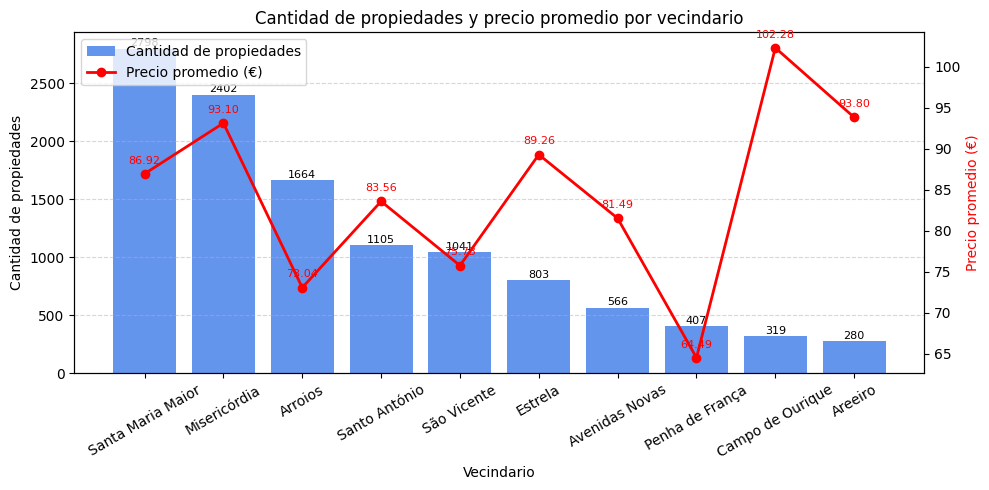

In [71]:
import matplotlib.pyplot as plt

top10_barrio = agrupamiento_barrio.head(10)

fig, ax1 = plt.subplots(figsize=(10,5))

# Barras cantidad de propiedades
bars = ax1.bar(top10_barrio['neighborhood'], top10_barrio['cantidad_propiedades'], color='cornflowerblue', label='Cantidad de propiedades')
ax1.set_ylabel('Cantidad de propiedades')
ax1.set_xlabel('Vecindario')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Eje precio promedio (línea)
ax2 = ax1.twinx()
ax2.plot(top10_barrio['neighborhood'], top10_barrio['precio_promedio'], color='red', marker='o', linewidth=2, label='Precio promedio (€)')
ax2.set_ylabel('Precio promedio (€)', color='red')

# Título
plt.title('Cantidad de propiedades y precio promedio por vecindario')

# Etiquetas de valores
for i, val in enumerate(top10_barrio['cantidad_propiedades']):
    ax1.text(i, val + 2, val, ha='center', va='bottom', fontsize=8)
for i, val in enumerate(top10_barrio['precio_promedio']):
    ax2.text(i, val + 1, f'{val:.2f}', ha='center', va='bottom', fontsize=8, color='red')

# Leyenda
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

plt.tight_layout()
plt.show()

**SEGUNDO AGRUPAMIENTO**

In [65]:
# Agrupamiento por tipo de habitación
agrupamiento_room = (
    df_airbnb
    .groupby('room_type', as_index=False)
    .agg(
        precio_promedio=('price', 'mean'),
        satisfaccion_promedio=('overall_satisfaction', 'mean')
    )
)

agrupamiento_room['precio_promedio'] = agrupamiento_room['precio_promedio'].round(2)
agrupamiento_room['satisfaccion_promedio'] = agrupamiento_room['satisfaccion_promedio'].round(2)

display(agrupamiento_room)


,room_type,precio_promedio,satisfaccion_promedio
0,Entire home/apt,101.34,3.53
1,Private room,45.63,2.60
2,Shared room,34.40,2.44


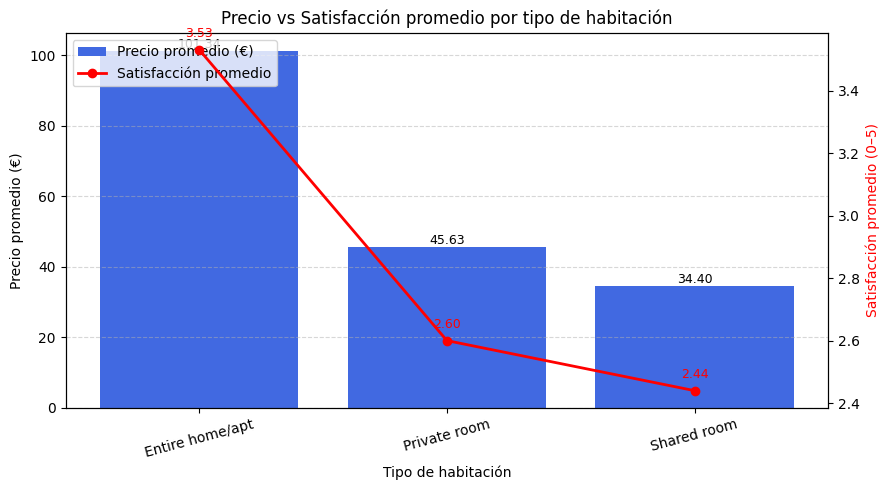

In [68]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(agrupamiento_room['room_type']))

fig, ax1 = plt.subplots(figsize=(9,5))

# Barras de precio
bars = ax1.bar(x, agrupamiento_room['precio_promedio'], label='Precio promedio (€)', color='royalblue')
ax1.set_ylabel('Precio promedio (€)')
ax1.set_xlabel('Tipo de habitación')
ax1.set_xticks(x)
ax1.set_xticklabels(agrupamiento_room['room_type'], rotation=15)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Línea satisfacción promedio
ax2 = ax1.twinx()
ax2.plot(
    x,
    agrupamiento_room['satisfaccion_promedio'],
    marker='o',
    linewidth=2,
    color='red',  # 🔴 AQUÍ CAMBIAS EL COLOR
    label='Satisfacción promedio'
)
ax2.set_ylabel('Satisfacción promedio (0–5)', color='red')

# Título
plt.title('Precio vs Satisfacción promedio por tipo de habitación')

# Etiquetas de valores
for rect, val in zip(bars, agrupamiento_room['precio_promedio']):
    ax1.text(rect.get_x()+rect.get_width()/2, rect.get_height()+0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=9)
for xi, val in zip(x, agrupamiento_room['satisfaccion_promedio']):
    ax2.text(xi, val+0.03, f'{val:.2f}', ha='center', va='bottom', fontsize=9, color='red')

# Leyenda
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

plt.tight_layout()
plt.show()
